## Structure of cleaned dataset

matches
- id
    - team1 -> str
    - team2 -> str
    - team_1_players -> [id]
    - team_2_players -> [id]
    - date -> str
    - link -> str
    - result -> str
    - commentary
        - innings1
            - over_summaries -> 
                     [over num, over summary, score, (RRR)
                      RR, batsman1, score, batsman2, score, 
                      bowler1 name, figures bowler2 name, figures]
            - balls -> [over, score, comment, extra]
        - innings2
            - (same)
            
players
- id 
    - alpha_name
    - batting_hand
    - batting_style
    - batting_style_long
    - bowling_hand
    - bowling_pacespin
    - bowling_style
    - bowling_style_long
    - card_long
    - card_qualifier
    - card_short
    - dob
    - known_as
    - mobile_name
    - player_id
    - player_primary_role
    - player_style_id
    - player_type
    - player_type_name

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

def plotHist(data):
    data_hist = np.random.randn(82)
    fig, ax = plt.subplots(figsize=(24,5))
    counts, bins, patches = ax.hist(data, facecolor='yellow', edgecolor='gray')

    # Set the ticks to be at the edges of the bins.
    ax.set_xticks(bins)
    # Set the xaxis's tick labels to be formatted with 1 decimal place...
    ax.xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))

    # Change the colors of bars at the edges...
    twentyfifth, seventyfifth = np.percentile(data_hist, [25, 75])
    for patch, rightside, leftside in zip(patches, bins[1:], bins[:-1]):
        if rightside < twentyfifth:
            patch.set_facecolor('green')
        elif leftside > seventyfifth:
            patch.set_facecolor('red')

    # Label the raw counts and the percentages below the x-axis...
    bin_centers = 0.5 * np.diff(bins) + bins[:-1]
    for count, x in zip(counts, bin_centers):
        # Label the raw counts
        ax.annotate(str(count), xy=(x, 0), xycoords=('data', 'axes fraction'),
            xytext=(0, -18), textcoords='offset points', va='top', ha='center')

        # Label the percentages
        percent = '%0.0f%%' % (100 * float(count) / counts.sum())
        ax.annotate(percent, xy=(x, 0), xycoords=('data', 'axes fraction'),
            xytext=(0, -32), textcoords='offset points', va='top', ha='center')


    # Give ourselves some more room at the bottom of the plot
    plt.subplots_adjust(bottom=0.1)
    plt.show()

In [2]:
import pickle
import json
from random import randint
from tqdm import tqdm

In [141]:
def load_data(filename):
    with open(f"{filename}.pkl", "rb") as f:
        data = pickle.load(f)
    print("Loaded data!")
    return data
        
def save_data(data, filename):
    with open(f"{filename}.pkl", "wb") as f:
        pickle.dump(data, f)
        
def export_to_json(data):
    with open('matches.json', 'w') as json_file:
        json.dump(data, json_file)
    
def getRandomMatch(data):
    return data[match_ids[randint(0, 1919)]]

def printInnings(data, matchId, inningsNum, summaries=False, highlightOnly=False):
    if summaries:
        for over in data[matchId]['commentary'][f'innings{inningsNum}']['over_summaries']:
            if highlightOnly:
                print(over[0])
            else:
                print(over)
    else:
        for ball in data[matchId]['commentary'][f'innings{inningsNum}']['balls']:
            print(ball)

In [4]:
data, players = load_data("clean_matches"), load_data("player_table")

Loaded data!
Loaded data!


### Innings 2 Format

https://regex101.com/r/3OCsgb/3

https://regex101.com/r/3OCsgb/2/

https://regex101.com/r/5wdeVl/1/

https://regex101.com/r/glJ1Bi/1

In [174]:
from IPython.display import clear_output
while input()=="":
    clear_output()
    for i in [randint(0, 1877) for i in range(20)]:
        try:
            print(list(data.values())[i]['commentary']['innings1']['over_summaries'][randint(0,50)])
        except:
            #print(list(data.values())[i]['result'])
            pass

['END OF OVER:27 | 3 Runs | BMUDA: 116/4 | RR: 4.29', 'Janeiro Tucker', '4 (9b)', 'David Hemp', '10 (18b)', 'George Codrington', '4-0-11-0']
['END OF OVER:7 | (maiden) | WI: 19/3 | RR: 2.71', 'Darren Bravo', '1 (7b)', 'Dwayne Bravo', '0 (1b)', 'Clint McKay', '4-1-7-1', 'Mitchell Starc', '3-1-11-2']
['END OF OVER:46 | 3 Runs | PAK: 193/8 | RR: 4.19', 'Saeed Ajmal', '1 (5b)', 'Zulqarnain Haider', '10 (22b)', 'Lonwabo Tsotsobe', '10-3-27-4', 'Jacques Kallis', '6-0-22-0']
['END OF OVER:9 | 2 Runs | IRE: 27/0 | RR: 3.00', 'Gary Wilson', '9 (27b)', 'Paul Stirling', '14 (27b)', 'Mudassar Bukhari', '5-1-14-0']
['END OF OVER:34 | 2 Runs | ENG: 121/4 | RR: 3.55', 'Paul Collingwood', '20 (41b)', 'Andrew Flintoff', '45 (77b)', 'Michael Clarke', '2-0-13-0']
['END OF OVER:33 | 6 Runs | AUS: 178/2 | RR: 5.39', 'Damien Martyn', '35 (39b)', 'Ricky Ponting', '67 (77b)', 'Dwayne Bravo', '3-0-13-0', 'Ramnaresh Sarwan', '3-0-16-0']
['END OF OVER:24 | 3 Runs | ENG: 99/2 | RR: 4.12', 'Paul Collingwood', '1 (

KeyboardInterrupt: 

In [156]:
from collections import defaultdict
team_counts = defaultdict(int)
for i, m in data.items():
    team_counts[m['team1']] += 1
    team_counts[m['team2']] += 1

for i, (t, c) in enumerate(sorted(list(team_counts.items()),key=lambda x: -x[1])):
    print(f"{t:<15} | {c:>3}")

India           | 389
Sri Lanka       | 376
Australia       | 353
England         | 324
Pakistan        | 313
West Indies     | 297
South Africa    | 289
New Zealand     | 287
Bangladesh      | 250
Zimbabwe        | 233
Ireland         | 139
Afghanistan     | 121
Scotland        |  91
Kenya           |  64
Netherlands     |  52
Canada          |  48
U.A.E.          |  40
Hong Kong       |  22
P.N.G.          |  22
Bermuda         |  15
Nepal           |   6
Oman            |   5
Namibia         |   1
U.S.A.          |   1


In [280]:
def getBall():
    summary_lengths = []
    for i, m in data.items():
        for o in m['commentary']['innings2']['over_summaries']:
            if len(o) == 5: 
                print(f'{o[1]:<25} | {o[2]:<12} | {o[3]:<25} | {o[4]:<15} | ')
            summary_lengths.append(len(o))

In [335]:
import re
innings1pattern = "^END OF OVER:(?P<over>[1-9]|[1-4][0-9]|50|51) \| (?:(?P<runs>[0-9]|[1-4][0-9]) Run(?:s)? (?:(?P<wickets>[0-9]) (?:Wkt(?:s)? )?)?|\((?P<maiden>maiden)\) |\((?P<wicket_maiden>wicket maiden)\) )\| (?P<team>\w+): (?P<score>\d+)/(?P<team_wickets>\d+)(?: \| RR: (?P<RR>\d+\.\d+))?$"
innings2pattern = "^END OF OVER:(?P<over>[1-9]|[1-4][0-9]|50|51) \| (?:(?P<runs>[0-9]|[1-4][0-9]) Run(?:s)? (?:(?P<wickets>[0-9]) (?:Wkt(?:s)? )?)?|\((?P<maiden>maiden)\) |\((?P<wicket_maiden>wicket maiden)\) )\| (?P<team>\w+): (?P<score>\d+)/(?P<team_wickets>\d+) \((?P<required_runs>\d+)[A-ZA-z ]*(?:(?P<remaining_balls>\d+|(?:[1-9]|[1-4][0-9]|50)\.[1-6]) )?[A-Za-z,]* (?:RR: (?P<RR>\d+\.\d+))?(?:[, ]* )?(?:RRR: (?P<RRR>\d+\.\d+))?\)$"
batsmanPattern = "^(?P<runs>\d+) \((?P<balls>\d+)b\)$" 
bowlerPattern = "^(?P<overs>\d+(?:\.[1-9])?)-(?P<maidens>\d+)-(?P<runs>\d+)-(?P<wickets>\d+)$"

def getGroupValue(r, group):
    val = r.group(group)
    if val:
        return val
    else:
        return 0
def getBatsmanFigures(batsmanFigures):
    on_strike_score = re.search(batsmanPattern, batsmanFigures)
    return on_strike_score.group('runs'), on_strike_score.group('balls')
    
def getBowlerFigures(bowlingFigures):
    next_bowler_figures = re.search(bowlerPattern, bowlingFigures)
    return next_bowler_figures.group('overs'), next_bowler_figures.group('maidens'),  next_bowler_figures.group('runs'), next_bowler_figures.group('wickets')
    
def getOver(over):
    return_over = {}
    innings = re.search(innings1pattern, over[0])
    inningsNum = 1
    if not innings:
        innings = re.search(innings2pattern, over[0])
        inningsNum = 2
        
    return_over['number'] = getGroupValue(innings, 'over')
    return_over['runs'] = getGroupValue(innings, 'runs')
    return_over['wickets'] = getGroupValue(innings, 'wickets')
    return_over['maiden'] = getGroupValue(innings, 'maiden')
    return_over['wicket_maiden'] = getGroupValue(innings, 'wicket_maiden')
    return_over['team'] = getGroupValue(innings, 'team')
    return_over['team_runs'] = getGroupValue(innings, 'score')
    return_over['team_wickets'] = getGroupValue(innings, 'team_wickets')
    return_over['RR'] = getGroupValue(innings, 'RR')
    
    if inningsNum == 2:
        try:
            return_over['RRR'] = getGroupValue(innings, 'RRR')
            return_over['required_runs'] = getGroupValue(innings, 'required_runs')
            return_over['remaining_balls'] = getGroupValue(innings, 'remaining_balls')
        except:
            return_over['RRR'] = None
            return_over['required_runs'] = None
            return_over['remaining_balls'] = None
            
    on_strike_batsman, on_strike_batsman_runs, on_strike_batsman_balls = None, None, None
    off_strike_batsman, off_strike_batsman_runs, off_strike_batsman_balls = None, None, None
    next_bowler, n_overs, n_maidens, n_runs, n_wickets = None, None, None, None, None
    previous_bowler, p_overs, p_maidens, p_runs, p_wickets = None, None, None, None, None
    
    if len(over) == 3:
        next_bowler = over[1]
        n_overs, n_maidens, n_runs, n_wickets = getBowlerFigures(over[2])
        
    elif len(over) == 5:
        if re.match(batsmanPattern, over[2]):
            on_strike_batsman = over[1]
            on_strike_batsman_runs, on_strike_batsman_balls = getBatsmanFigures(over[2])
            if re.match(batsmanPattern, over[4]):
                off_strike_batsman = over[3]
                off_strike_batsman_runs, off_strike_batsman_balls = getBatsmanFigures(over[4])
            else:
                next_bowler = over[3]
                n_overs, n_maidens, n_runs, n_wickets = getBowlerFigures(over[4])
        else:
            next_bowler = over[1]
            n_overs, n_maidens, n_runs, n_wickets = getBowlerFigures(over[2])
            previous_bowler = over[3]
            p_overs, p_maidens, p_runs, p_wickets = getBowlerFigures(over[4])
            
    elif len(over) == 7:
        if re.match(batsmanPattern, over[4]):
            on_strike_batsman = over[1]
            on_strike_batsman_runs, on_strike_batsman_balls = getBatsmanFigures(over[2])
            off_strike_batsman = over[3]
            off_strike_batsman_runs, off_strike_batsman_balls = getBatsmanFigures(over[4])
            next_bowler = over[5]
            n_overs, n_maidens, n_runs, n_wickets = getBowlerFigures(over[6])
        else:
            on_strike_batsman = over[1]
            on_strike_batsman_runs, on_strike_batsman_balls = getBatsmanFigures(over[2])
            next_bowler = over[3]
            n_overs, n_maidens, n_runs, n_wickets = getBowlerFigures(over[4])
            previous_bowler = over[5]
            p_overs, p_maidens, p_runs, p_wickets = getBowlerFigures(over[6])
    else:
        on_strike_batsman = over[1]
        on_strike_batsman_runs, on_strike_batsman_balls = getBatsmanFigures(over[2])
        off_strike_batsman = over[3]
        off_strike_batsman_runs, off_strike_batsman_balls = getBatsmanFigures(over[4])
        next_bowler = over[5]
        n_overs, n_maidens, n_runs, n_wickets = getBowlerFigures(over[6])
        previous_bowler = over[7]
        p_overs, p_maidens, p_runs, p_wickets = getBowlerFigures(over[8])
        
    return_over['on_strike_batsman'] = on_strike_batsman
    return_over['on_strike_batsman_runs'] = on_strike_batsman_runs
    return_over['on_strike_batsman_balls'] = on_strike_batsman_balls
    return_over['off_strike_batsman'] = off_strike_batsman
    return_over['off_strike_batsman_runs'] = off_strike_batsman_runs
    return_over['off_strike_batsman_balls'] = off_strike_batsman_balls
    return_over['next_bowler'] = next_bowler
    return_over['next_bowler_overs_bowled'] = n_overs
    return_over['next_bowler_maidens_bowled'] = n_maidens
    return_over['next_bowler_runs_conceded'] = n_runs
    return_over['next_bowler_wickets_taken'] = n_wickets
    return_over['previous_bowler'] = previous_bowler
    return_over['previous_bowler_overs_bowled'] = p_overs
    return_over['previous_bowler_maidens_bowled'] = p_maidens
    return_over['previous_bowler_runs_conceded'] = p_runs
    return_over['previous_bowler_wickets_taken'] = p_wickets
    
    return return_over

In [336]:
def checkSummaries():
    for i, m in data.items():
        summaries2 = m['commentary']['innings2']['over_summaries']
        for over in summaries2:
            o = getOver(over)
            try:
                o = getOver(over)
            except Exception as e:
                print(over)
                return
#         for k, v in o.items():
#             if not v: v = 'N/A'
#             print(f'{k:<30} : {v:>20}')
checkSummaries()

In [337]:
def replaceOverSummaries(data):
    newData = data.copy()
    for i, m in data.items():
        summaries1 = m['commentary']['innings1']['over_summaries']
        summaries2 = m['commentary']['innings2']['over_summaries']
        newSummaries = []
        for over in summaries1:
            newSummaries.append(getOver(over))
        newData[i]['commentary']['innings1']['over_summaries'] = newSummaries
        
        newSummaries = []
        for over in summaries2:
            newSummaries.append(getOver(over))
        newData[i]['commentary']['innings2']['over_summaries'] = newSummaries
    return newData

newData = replaceOverSummaries(data)

In [344]:
for i, m in newData.items():
    sums = m['commentary']['innings1']['over_summaries']
    for over in sums[::-1]:
        for k, v in over.items():
            if not v: v = 'N/A'
            print(f'{k:<30} : {v:>20}')
        print("-----"*20)
    break

number                         :                    1
runs                           :                    1
wickets                        :                  N/A
maiden                         :                  N/A
wicket_maiden                  :                  N/A
team                           :                  AUS
team_runs                      :                    1
team_wickets                   :                    0
RR                             :                 1.00
on_strike_batsman              :       Adam Gilchrist
on_strike_batsman_runs         :                    0
on_strike_batsman_balls        :                    6
off_strike_batsman             :         Shane Watson
off_strike_batsman_runs        :                    0
off_strike_batsman_balls       :                    0
next_bowler                    :         Ian Bradshaw
next_bowler_overs_bowled       :                    1
next_bowler_maidens_bowled     :                    0
next_bowler_runs_conceded   

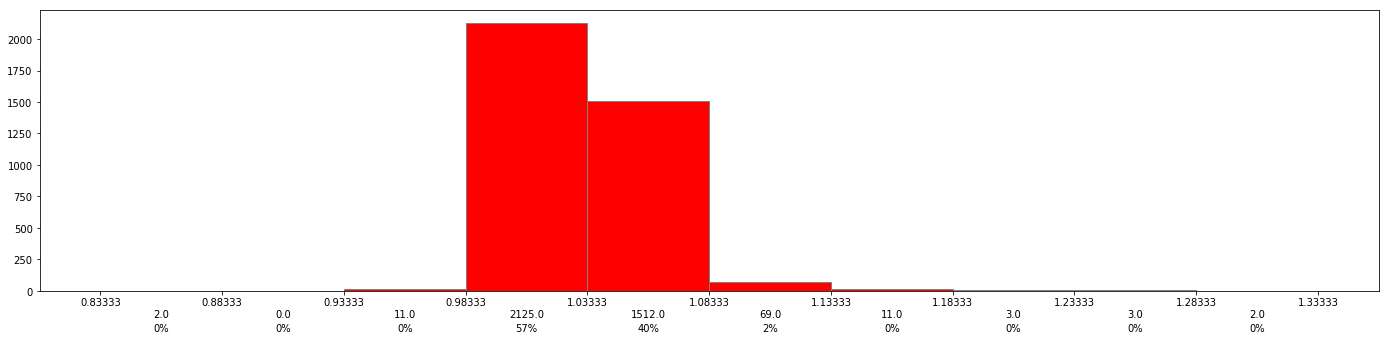

In [175]:
ball_counts = []

for i, m in data.items():
    ball_counts.append((len(m['commentary']['innings1']['balls']), len(m['commentary']['innings1']['over_summaries']), i))
    ball_counts.append((len(m['commentary']['innings2']['balls']), len(m['commentary']['innings2']['over_summaries']), i))
    
def divide(x):
    try:
        return x[0]/(x[1]*6)
    except:
        return 1
    
ball_count_divided = list(map(divide, ball_counts))
plotHist(ball_count_divided)

In [345]:
save_data(newData, "clean_matches")

In [356]:
export_to_json(newData)